## CLASS 4 AGENDA
  * **Questions/Concerns from class 3**
  * **Effectively working with timeseries and incomplete data**
  * **Learning to plot**
  * **Visualization/pandas HW**

I hope you've learned a few things so far about the power of **Python** and **pandas**.

Today we are going to focus on a type of dataset that we haven't explicitly talked about just yet but that crops up in almost every analytical project, either in industry or in academia...

### Timeseries!!

While working with timeseries we are also going to use some of the really cool plotting functionality of **pandas** to make our analyses a lot more convincing to the more visual people you're going to be showing/delivering your analyses to.

But before all of that, let's briefly go over what we've learned so far.

Lets go over what we've learned how to do in **pandas** so far:

* Load data in correctly into a `DataFrame` object using `pandas.read_csv()`
* View parts of the dataset quickly using `datasetName.head()` and `datasetName.tail()`
* Get the format of every column of the dataset using `datasetName.dtypes`
* Get all of the unique values of a specific column using `datasetName.unique()`
* Select columns and rows based on specific criteria by generating and applying masks
* Subselect entire portions of a dataset based on criteria
* Delete columns we are not interested in using `del datasetName[columnName]`
* Format columns with time data into a time format using `pandas.to_datetime()` that then allows us to access many aspects of the times using `datasetName[timeColumn].dt`
* Get the overall size and shape of the dataset (excluding the `index`) using `datasetName.shape`
* Get summary statistics about the dataset or about specific columns using `datasetName[optionalColumnNames].describe()`
* Group data based on certain columns using `datasetName.groupby()` and work with groups using:
  * Predefined functions like `groupedDatasetName.size()` directly on the grouped objects
  * Other functions that are passed to `groupedDatasetName.agg(yourFunctionHere)` like `mean` and `std` or functions that you create yourself
  * Filters that remove data you are not interested in and spits out a new filtered, ungrouped dataset using `groupedDatasetName.filter(yourFilterFunction)` where `yourFilterFunction` can either be an anonymous function (`lambda x: your function condition(s)`) or a standard python function (`def yourFunctionName(yourInputs): return your function condition(s)`)
* Compute correlations and correlation matrices between various numeric columns in a dataset using `datasetName[columnName].corr(otherColumn)` or `datasetName.corr()`.
* Use some basic `str` functionality to format columns with text and create new columns from the formatting/parsing of the `string` values found within them.
* Convert categorical variables, stored as `string` types, into indicator variables using `get_dummies()`
* Convert numerical variables into categorical variables through discretization using `cut()`
* Join 2 datasets along one or multiple keys using `yourDataset.merge(yourOtherDataset,on=joinKeys)`
* Look for inconsistent data and remove it from our dataset

Gaze upon all that you've learned thus far and marvel at your progress!

...

Ok, thats enough, lets learn to work with timeseries and how to plot them.

In [2]:
import pandas as pd
import scipy.stats as stats
%matplotlib inline
pd.options.display.mpl_style = 'default'

As always, we need to import our one super necessary module (**pandas**).

We are also going to import a submodule of [**SciPy**](http://scipy.org) called `stats` because we want a bit more advanced functionality available for our plots (specifically, we are going to be plotting some standard errors, so we want the ability to compute the standard error of a given set of values available to us) that **NumPy** can't provide.

Finally we are going to be doing some formatting of how we want plots to show up in our **IPython notebook** session and do some extra magic that I'll explain:

```
%pylab inline
pd.options.display.mpl_style = 'default'
```

These two lines tell the **notebook** that:
* We want to import a bunch of graphing and numerical functionality all at once (`%pylab`)
* We want the basic styling of our plots to take on default values (this makes them a bit prettier)

The `%pylab` magic function is especially cool! It makes the following imports:

```
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *
```
It also tells the **notebook** that we want all plots to appear directly inside of it when we ask to plot something (the `inline` argument to the `%pylab` magic does this)

What this means is we get `import numpy as np` baked in! We can use `np.whatever` as well as access to a bunch of other cool plotting functionality! **All in one line!**

Now that we have organized our imports, lets load in our data, take a look at its dimensionality, and look at the first few rows:

In [3]:
priceData = pd.read_csv("../data/Crowd-Sourced_Price_Collection_CSV.csv",index_col=0)

Here we are passing an extra parameter called `index_col` to the `read_csv()` function to let it know that the first column of the dataset should be treated as the index.

You may not have known this, but if you go to the link for the [World Bank](http://data.worldbank.org/data-catalog/crowd-sourced-price-collection) where the dataset is located, they tell you that theres an index :).

In [4]:
print priceData.shape
priceData.head(30)

(506728, 234)


,Country,Location Code,Location Name,Outlet Code,Outlet Type,Obs Date (yyyy-MM-dd),Product Code,Product Name,Pref. Qty,Obs. Qty,...,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234
Line,,,,,,,,,,,,,,,,,,,,,
1,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,11,"Rice, long grain",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,13,"Cornflakes, Kellogg's",500.0,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,14,"Flour, wheat",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Bangladesh,2,Banapara Baraigram,4012,Supermarket,2012-04-28,11,"Rice, long grain",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bangladesh,2,Banapara Baraigram,4012,Supermarket,2012-04-28,12,"Rice, white, broken",1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bangladesh,2,Banapara Baraigram,4012,Supermarket,2012-04-28,13,"Cornflakes, Kellogg's",500.0,250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Bangladesh,2,Banapara Baraigram,4012,Supermarket,2012-04-28,15,"Flour, maize",2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###YUCK! Look at all of those Unnamed:Blah column names and NaN values!

Why all of the NaN values and all of the awful column names after the first few normal ones?

If you take a look at the first 5 lines of the file in its raw format you will understand why:

```
Line,Country,Location Code,Location Name,Outlet Code,Outlet Type,Obs Date (yyyy-MM-dd),Product Code,Product Name,Pref. Qty,Obs. Qty,Quantity,Obs. UoM Code,Obs Price,Conv. Price,Price Type Name,Rejected,Currency,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,11,"Rice, long grain",1,1,1 kg,1,1.322749828,1.322749828,Regular price,0,USD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1,1,1 kg,1,0.577199925,0.577199925,Regular price,0,USD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1,1,1 kg,1,0.577199925,0.577199925,Regular price,0,USD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,13,"Cornflakes, Kellogg's",500,500,500 g,2,4.930249357,4.930249357,Regular price,0,USD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
```

It looks like the person(s) who put this together wanted every space within a given line to be filled with some kind of default text so that you knew when a given line ended and the next one began. So, obviously, they just put commas everywhere there should be blank space, and when **pandas** tried to load the file in, using `,` as a separator it effectively saw that there was no data between successive `,` fields in the dataset (as we saw as well).

When this happens, **pandas** does two things:

1. It creates default names for the columns when the column name line (which is the first line, by default) has no values in between successive delimiters (`,` by default, and in our case). This is why we are getting all of the `Unnamed: an integer` column names
2. It puts in a default value into the cells in the table that have no values in them. This default value is `NaN` and stands for **n**ot **a** **n**umber. 

We need to do something about this, and thankfully **pandas** has some cool functionality to work with this kind of incomplete data.

What we are going to do is use the function `dropna()` to get rid of all of those `NaN` values and their associated columns:

In [5]:
priceDataCleaned = priceData.dropna(how="all",axis=1)
print priceDataCleaned.shape
priceDataCleaned.head()

(506728, 17)


,Country,Location Code,Location Name,Outlet Code,Outlet Type,Obs Date (yyyy-MM-dd),Product Code,Product Name,Pref. Qty,Obs. Qty,Quantity,Obs. UoM Code,Obs Price,Conv. Price,Price Type Name,Rejected,Currency
Line,,,,,,,,,,,,,,,,,
1,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,11,"Rice, long grain",1.0,1.0,1 kg,1,1.322750,1.322750,Regular price,0,USD
2,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1.0,1.0,1 kg,1,0.577200,0.577200,Regular price,0,USD
3,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,12,"Rice, white, broken",1.0,1.0,1 kg,1,0.577200,0.577200,Regular price,0,USD
4,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,13,"Cornflakes, Kellogg's",500.0,500.0,500 g,2,4.930249,4.930249,Regular price,0,USD
5,Bangladesh,1,Alipur,2570,Supermarket,2012-03-16,14,"Flour, wheat",1.0,1.0,1 kg,1,0.360750,0.360750,Regular price,0,USD


In [6]:
priceDataCleaned.columns

Index([u'Country', u'Location Code', u'Location Name', u'Outlet Code',
       u'Outlet Type', u'Obs Date (yyyy-MM-dd)', u'Product Code',
       u'Product Name', u'Pref. Qty', u'Obs. Qty', u'Quantity',
       u'Obs. UoM Code', u'Obs Price', u'Conv. Price', u'Price Type Name',
       u'Rejected', u'Currency'],
      dtype='object')

`dropna()` has a lot of functionality baked in. It allows you to drop data points or collections of datapoints along any axis (rows, columns, additional dimensions if you have them) whenever it finds a `NaN` value.

In our case:

`priceData = priceData.dropna(axis=1)`

Tells pandas to drop any column (the parameter `axis=1`) from the dataset whenever the column has any `NaN` values.

What would have happened if we had done:

`priceData = priceData.dropna()`

?

Because by default this is the same thing as:

`priceData = priceData.dropna(axis=0)`

This would have dropped any row that had at least one `NaN` value. Since every row in the dataset has `NaN` values, it would have returned an empty `DataFrame`!

Now we are going to do some really quick formatting of the column names so that they are a bit easier to type/access:

In [10]:
#priceData = priceData.dropna(how="all",axis=1)
#priceData.columns
#priceData.columns = priceData.columns.map(lambda x: x.replace(" ","_"))
#priceData.columns = priceData.columns.map(lambda x: x.replace(".",""))
priceData.dtypes

Country                   object
Location_Code              int64
Location_Name             object
Outlet_Code                int64
Outlet_Type               object
Obs_Date_(yyyy-MM-dd)     object
Product_Code               int64
Product_Name              object
Pref_Qty                 float64
Obs_Qty                  float64
Quantity                  object
Obs_UoM_Code               int64
Obs_Price                float64
Conv_Price               float64
Price_Type_Name           object
Rejected                   int64
Currency                  object
dtype: object

In [15]:
my_list = [1,2,3,4]
my_list_doubled = filter(lambda x:x>2,my_list)
my_list_doubled

[3, 4]

`map()` is a really useful function that is part of both standard **Python** and of **pandas**.

In our case, you can call it straight from the columns of the `DataFrame` and do something to the column names very rapidly.

Briefly, `map()` always takes in a collection (a set, a list, an array, etc.) of values, operates on each of those values one-by-one and returns a result of the same size and type (after transformation) of the values passed in. 

What we are doing in the first two lines above is:

1. Replacing every space (` `) in the column names with an underscore (`_`)
* Replacing every period (`.`) in the column names with nothing ()

This will let us access a lot of the column names in a much easier way as they won't have periods and spaces within them any longer (we can access individual columns by doing `priceData.columnName` instead of `priceData["columnName"]`)

Since we are working with timeseries, lets get the column that actually has times in it and convert it into a time format that **pandas** understands and remove the (terribly named) time column that we converted:

In [17]:
#priceData["Date"] = pd.to_datetime(priceData["Obs_Date_(yyyy-MM-dd)"],format="%Y-%m-%d",unit='D')
#del priceData["Obs_Date_(yyyy-MM-dd)"]
priceData.dtypes

Country                    object
Location_Code               int64
Location_Name              object
Outlet_Code                 int64
Outlet_Type                object
Product_Code                int64
Product_Name               object
Pref_Qty                  float64
Obs_Qty                   float64
Quantity                   object
Obs_UoM_Code                int64
Obs_Price                 float64
Conv_Price                float64
Price_Type_Name            object
Rejected                    int64
Currency                   object
Date               datetime64[ns]
dtype: object

We passed two clarifying parameters to the `to_datetime()` method:

* We gave the `format` parameter a hint about the formatting of the dates (we told it that the format is Year-Month-Day for all of the dates)
* We gave the `unit` parameter information about the frequency scale of the data (it is `D` for daily)

Once we got the date parsed properly, we removed the old column because we don't need it anymore.

Now lets take a look at what we are dealing with:

In [19]:
countries = priceData.Country.unique()
currencies = priceData.Currency.unique()
productPriceCounts = priceData.Product_Name.value_counts()
print "The countries in the dataset: "
print countries
print "The currencies in the dataset" 
print currencies
print "The overall dataset shape:"
print priceData.shape

print "Counts of all of the unique products seen:"
print productPriceCounts

The countries in the dataset: 
['Bangladesh' 'Brazil' 'India' 'Indonesia' 'Kenya' 'Nigeria' 'Pakistan'
 'Philippines']
The currencies in the dataset
['USD']
The overall dataset shape:
(506728, 17)
Counts of all of the unique products seen:
Coca Cola / Pepsi Cola             18146
Sugar, white                       17940
Chicken eggs                       17887
Milk                               17582
Chicken legs                       17565
Sunflower oil                      17514
Soybean oil                        17444
Potatoes, brown                    17387
Carrots                            17351
Banana                             17310
Bread, white, sliced               17247
Palm oil                           17230
Apple                              17188
Onion                              17085
Rice, white, broken                16983
Orange                             16893
Instant coffee, Nescafe Classic    16823
Rice, long grain                   16802
Beans, white, dried   

We are just trying to get an overall view of the dataset, the only thing new here is `value_counts()` which is a cool method that just gives you counts of all of the values found within a given column.

How about we visualize these counts:

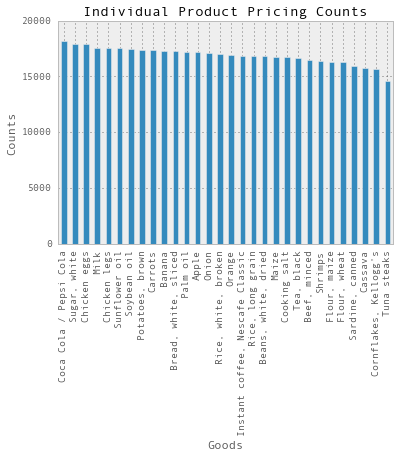

In [20]:
productPriceCounts.plot(kind='bar', title="Individual Product Pricing Counts")
plt.ylabel("Counts")
plt.xlabel("Goods")

Wow, there are a lot of soda prices in this dataset!

Plotting in pandas is super easy, once the given data is in the format you want.

Here we take our `productPriceCounts` `Series` object use its `plot()` function:

`productPriceCounts.plot(kind='bar', title="Individual Product Pricing Counts")`

All `DataFrame` and `Series` objects have plotting functionality available directly from them, and [the plotting functionality is extensive](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

We are doing several things here:

1. We pass a `kind` parameter to define the kind of plot we want (a bar plot, specified by the keyword `bar`) and a `title` parameter to set the title of the graph
* Additional parameters, that are set directly afterwards **on the current plot** (this is sort of like Javascript), that set the plot's x and y axis labels (This is done by calling `plt.xlabel()` and `plt.ylabel`, which was imported when we used the `%pylab` magic function, remember?)

Now lets actually do some timeseries plotting and get the average cost of soda over time, with standard errors of the mean overlaid in both cases:

1. Regardless of country
* On a per-country basis
* Both cases, with 10 day rolling means applied to the (daily) data

/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


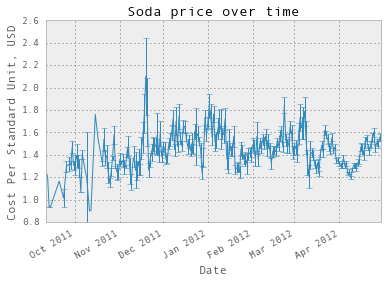

In [21]:
sodaPrices = priceData[priceData.Product_Name=="Coca Cola / Pepsi Cola"] #1

sodaGroups = sodaPrices.groupby("Date") #2
sodaMeans = sodaGroups["Conv_Price"].agg(np.mean) #3
sodaErrs = sodaGroups["Conv_Price"].agg(stats.sem) #4

sodaMeans.plot(yerr=sodaErrs,title="Soda price over time") #5
plt.ylabel("Cost Per Standard Unit, USD") #6

So here we: 

1. Selected only the rows that contained soda prices and grouped them by date (**lines 1-2**) * Computed groupwise (per-date) means and standard errors of the mean (**lines 3-4**)
* Plotted the means with the standard errors overlaid by passing the standard error aggregate to `yerr` as a parameter to the `plot` function called from within `sodaMeans` (**line 5**)
* Added y axis label using `plt.ylabel` (**line 6**)

We can make this a bit prettier by using the function `plt.fill_between` after just plotting the `sodaMeans`

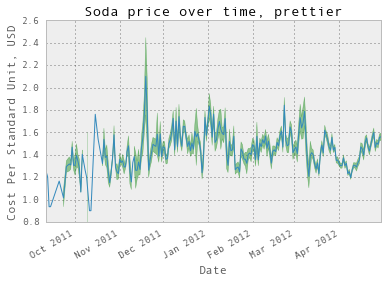

In [22]:
sodaMeans.plot(title="Soda price over time, prettier")
plt.fill_between(x=sodaMeans.index, y1=sodaMeans-sodaErrs, y2=sodaMeans+sodaErrs, color='g', alpha=0.4)
plt.ylabel("Cost Per Standard Unit, USD")
#plt.fill_between

`plt.fill_between` fills the range of values between some range, for every datapoint you pass it from the previously plotted axis. 

Here we are passing: 

1. The `x` parameter for the x coordinates where we want to fill in the data (`sodaMeans.index` is the Date index of the values we are going to work on)
* The lower value and upper value between which we would like to fill (parameters `y1` and `y2`; we want to fill one standard error below and above the mean)
* The `color` and `alpha` parameters are optional and dictate the color of the fill (in our case `b` is for blue) and the level of transparency of that color (the `alpha` parameter,which ranges between 0 and 1; we set this to a low value so that we can see the underlying curve)

This is just an example of how you can make your graph a bit easier on the eyes. 

You can see a lot more of the ways in which you can make more customizable graph layouts in the [pandas plotting documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) and, for really low-level plotting access, the [matplotlib documentation](http://matplotlib.org/contents.html)

Ok, lets move onto generating this same graph on a per-country basis, which is a bit trickier.

Lets start by generating our per-country soda groups and aggregate values:

In [24]:
countrySodaGroups = sodaPrices.groupby(["Country","Date"])
byCountrySodaMeans = countrySodaGroups["Conv_Price"].agg(np.mean)
byCountrySodaErrs = countrySodaGroups["Conv_Price"].agg(stats.sem)

Now, lets try to plot it as is (**Hint:** Its not going to be pretty!):

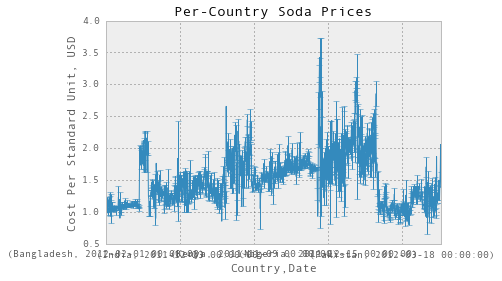

In [25]:
byCountrySodaMeans.plot(yerr =byCountrySodaErrs, title='Per-Country Soda Prices')
plt.ylabel("Cost Per Standard Unit, USD")

Wow, that is ugly and completely incomprehensible and how come there aren't a bunch of different lines for every country?

Lets take a look at the first few rows of the original `sodaMeans` aggregate and the new `byCountrySodaMeans` aggregate to see if there is something different between them (there is):

In [26]:
print sodaMeans.head()
print ""
print byCountrySodaMeans.head(100)

Date
2011-09-11    1.248738
2011-09-12    1.202488
2011-09-13    0.936553
2011-09-14    0.936553
2011-09-20    1.165488
Name: Conv_Price, dtype: float64

Country     Date      
Bangladesh  2012-02-01    1.176854
            2012-02-02    1.171131
            2012-02-03    1.110261
            2012-02-04    1.131246
            2012-02-05    0.983692
            2012-02-06    1.052033
            2012-02-07    1.150077
            2012-02-08    1.094784
            2012-02-09    1.183650
            2012-02-10    1.005053
            2012-02-11    0.990086
            2012-02-12    1.282735
            2012-02-13    1.003366
            2012-02-14    1.062388
            2012-02-15    1.189425
            2012-02-16    1.121915
            2012-02-17    1.045620
            2012-02-18    1.127944
            2012-02-19    1.035598
            2012-02-20    1.019053
            2012-02-21    1.062642
            2012-02-22    1.063296
            2012-02-23    1.077565
            2012-0

So it looks like we need the date to be the outer axis when we plot. But how do we do that?

What we have to do is make the individual countries columns in the aggregate dataset.

This process of taking an outer index in a dataset and turning it into a column is called **unstacking** a dataset.

To do this, call the `unstack()` function from the aggregate and pass in the level of the unstack (by default, the level is the most inner index, which is not what we want here):

In [31]:
unstackedByCountryMeans = byCountrySodaMeans.unstack(level=0)
unstackedByCountryMeans.head()
#stackedByCountryMeans = unstackedByCountryMeans.stack(level=0)
#stackedByCountryMeans

Country,Bangladesh,Brazil,India,Indonesia,Kenya,Nigeria,Pakistan,Philippines
Date,,,,,,,,
2011-09-11,NaN,NaN,1.248738,NaN,NaN,NaN,NaN,NaN
2011-09-12,NaN,NaN,1.202488,NaN,NaN,NaN,NaN,NaN
2011-09-13,NaN,NaN,0.936553,NaN,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,0.936553,NaN,NaN,NaN,NaN,NaN
2011-09-20,NaN,NaN,1.165488,NaN,NaN,NaN,NaN,NaN


In [33]:
unstackedByCountryMeans = byCountrySodaMeans.unstack(level=0)
unstackedByCountryErrs = byCountrySodaErrs.unstack(level=0)
print unstackedByCountryMeans.head()
print unstackedByCountryMeans.tail()
#pd.rolling_mean(countrySodaGroups["Conv_Price"].aggregate(np.mean).unstack(level=0),10).plot()

Country     Bangladesh  Brazil     India  Indonesia  Kenya  Nigeria  Pakistan  \
Date                                                                            
2011-09-11         NaN     NaN  1.248738        NaN    NaN      NaN       NaN   
2011-09-12         NaN     NaN  1.202488        NaN    NaN      NaN       NaN   
2011-09-13         NaN     NaN  0.936553        NaN    NaN      NaN       NaN   
2011-09-14         NaN     NaN  0.936553        NaN    NaN      NaN       NaN   
2011-09-20         NaN     NaN  1.165488        NaN    NaN      NaN       NaN   

Country     Philippines  
Date                     
2011-09-11          NaN  
2011-09-12          NaN  
2011-09-13          NaN  
2011-09-14          NaN  
2011-09-20          NaN  
Country     Bangladesh    Brazil     India  Indonesia     Kenya   Nigeria  \
Date                                                                        
2012-04-26    1.097839  1.997481  1.235089   2.390898  1.670572  2.055503   
2012-04-27    1.088

What `unstack` does is takes the level of the `index` you pass it and turns that `index` into a column. 

In our case, we had a multi-level `index`, called a `MultiIndex` in **pandas** (`Country,Date`) with a single column (the mean or the sem, depending on the aggregation) and by applying the unstack on the first level (level=0, which is Country), we made individual country-based columns of those values. 

In cases where you have multiple columns prior to unstacking, that index column simply becomes the top-level column value for the set of columns.

There are lots of `NaN` values in this unstacked dataset, but thats ok, because **pandas** handles these very gracefully when you try to plot it by simply leaving them out:

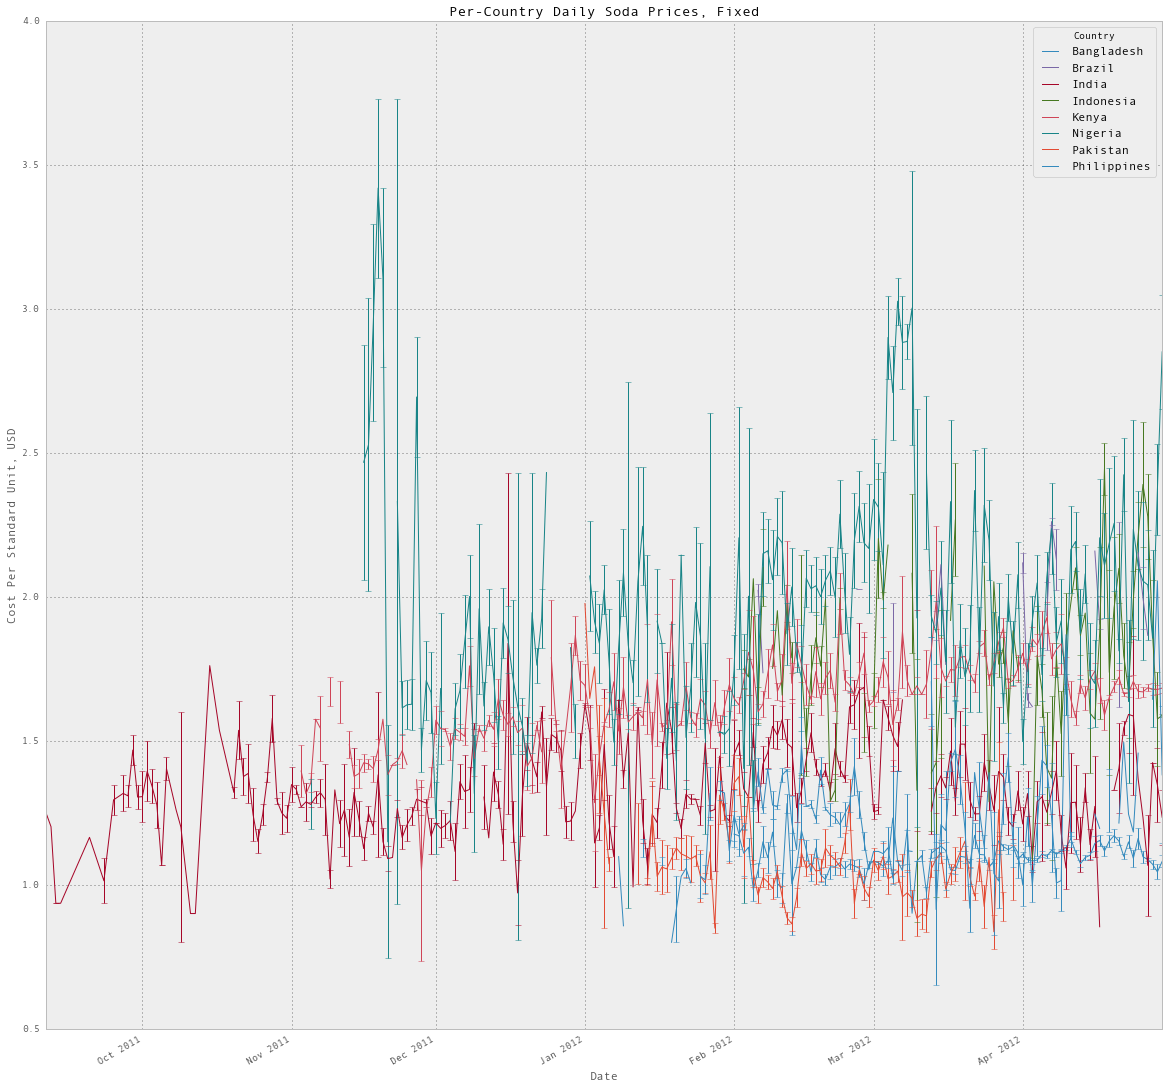

In [35]:
unstackedByCountryMeans.plot(yerr = unstackedByCountryErrs, title="Per-Country Daily Soda Prices, Fixed",figsize=(20,20))
plt.ylabel("Cost Per Standard Unit, USD")

Ok, this is really, really cluttered, lets separate all of the countries into individual subplots by passing another argument `subplots=True` to the `plot` function, this will make it so that every column is plotted in its own subplot:

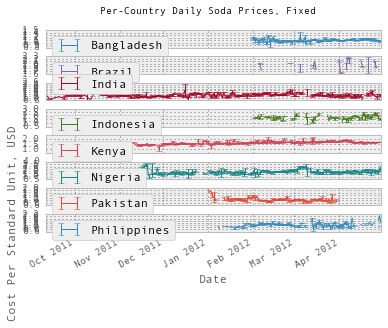

In [36]:
unstackedByCountryMeans.plot(yerr=unstackedByCountryErrs, title="Per-Country Daily Soda Prices, Fixed", subplots=True)
plt.ylabel("Cost Per Standard Unit, USD")

Ok, this is still really cluttered. 

Lets see if we can't make this a bit more readable, by passing two more parameters - `figsize` and `layout` to the `plot` function to make it so that we can see all of the y values a bit better:

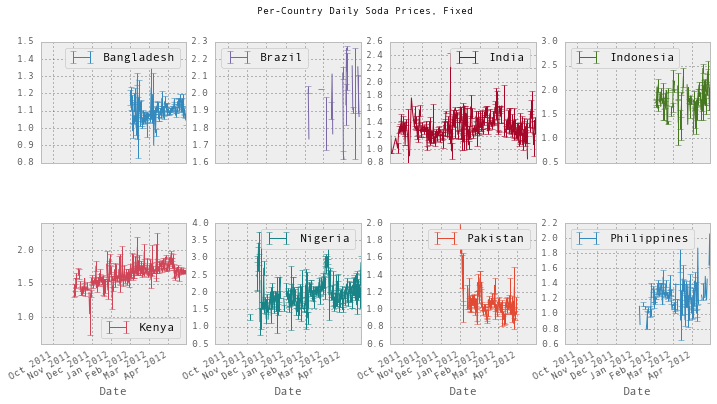

In [38]:
ax = unstackedByCountryMeans.plot(yerr=unstackedByCountryErrs, title="Per-Country Daily Soda Prices, Fixed", subplots=True,figsize=(12,6),layout=(2, 4))#,ylabel="Cost Per Standard Unit, USD")
#ax.ylabel()

Here is what the two new parameters do:

* `figsize` takes a tuple of 2 numbers and tells `plot` how large to make the figure in inches, where the two numbers are the width and height of the plot, respectively. We want our figure to be 12 inches wide by 6 inches tall, hence the `figsize=(12,6)`
* `layout` only works when you set `subplot=True`, and also takes a tuple of two numbers. It tells `plot` what the layout, in number of rows and columns, of the figure should be. We want a figure that is two subplots tall (2 rows) and 4 subplots plots wide (4 columns), hence `layout=(2,4)`.


This looks significantly better, but all of the y axis ranges are different, which isn't helpful for us, since we want to be able to look at all of the axes on the same x/y scales.

So let's fix this so that all of the y values have the same ranges:

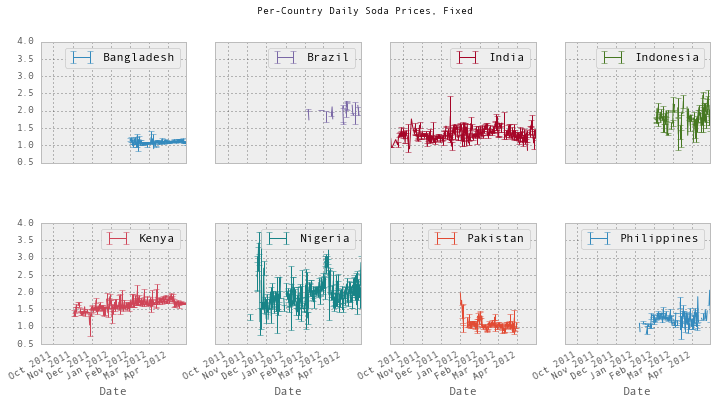

In [40]:
ax = unstackedByCountryMeans.plot(yerr=unstackedByCountryErrs,
                                  title="Per-Country Daily Soda Prices, Fixed",
                                  subplots=True,figsize=(12,6),layout=(2, 4),
                                  sharey=True)#,ylabel="Cost Per Standard Unit, USD")

Here we are adding one final parameter `sharey=True` to make sure all of the plots use the same exact y axis range (there is a separate `sharex` parameter, but as you can tell, we don't need to use it here. If we did, we could very easily have passed it as well).

At this point, we have a pretty reasonable looking plot!

It looks like the error bars are cluttering this figure, so lets remove them and just look at the means:

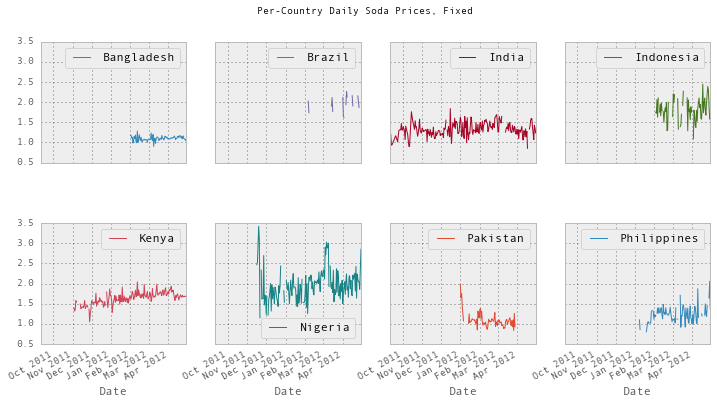

In [41]:
ax = unstackedByCountryMeans.plot(title="Per-Country Daily Soda Prices, Fixed",
                                  subplots=True,figsize=(12,6),
                                  layout=(2, 4),sharey=True)#,ylabel="Cost Per Standard Unit, USD")

We can clearly tell that prices in Bangladesh, Pakistan, the Philippines, and India tend to hover around 1.00-1.50, whereas prices in Indonesia, Kenya, Nigeria, and Brazil appear significantly higher, starting at around 1.50 and going to almost 3.00 for some time in Nigeria.

What's really cool is dates that are missing values are simply not plotted, so we can very quickly see that, for some reason, Brazilian soda prices are really scarce in the dataset.

One more thing to mention, whenever you pass parameters in **Python**, you don't have to pass them in any specific order unless you want to. Here are the rules for passing parameters to functions:

* If you pass them in the order they are specified in the documentation, you don't have to name the parameters
* If you don't pass them in order, you have to name the parameter you're trying to pass a value to. To find out the names of parameters, just look at the function's documentation.

Ok, lets move on to tackling rolling means:

* Both cases, with 10 day rolling means applied to the (daily) data

In [42]:
tenDayRollingSodaMean = sodaMeans.rolling(window = 7,min_periods=4).mean()
tenDayRollingSodaStd  = sodaMeans.rolling(window = 7, min_periods=4).std()

In [44]:
#print sodaMeans
tenDayRollingSodaMean

Date
2011-09-11         NaN
2011-09-12         NaN
2011-09-13         NaN
2011-09-14    1.081083
2011-09-20    1.097964
2011-09-23    1.084070
2011-09-25    1.114284
2011-09-27    1.124194
2011-09-28    1.139472
2011-09-29    1.215469
2011-09-30    1.268152
2011-10-01    1.288351
2011-10-02    1.342658
2011-10-03    1.349459
2011-10-04    1.343771
2011-10-05    1.309245
2011-10-06    1.300086
2011-10-08    1.293793
2011-10-09    1.278698
2011-10-11    1.208150
2011-10-12    1.144969
2011-10-15    1.214039
2011-10-17    1.281155
2011-10-20    1.269331
2011-10-21    1.308752
2011-10-22    1.333812
2011-10-23    1.403315
2011-10-24    1.452444
2011-10-25    1.365239
2011-10-26    1.323388
                ...   
2012-04-01    1.418823
2012-04-02    1.398869
2012-04-03    1.362911
2012-04-04    1.353070
2012-04-05    1.329641
2012-04-06    1.326055
2012-04-07    1.308803
2012-04-08    1.298380
2012-04-09    1.283341
2012-04-10    1.277424
2012-04-11    1.267835
2012-04-12    1.268196
2012-0

The function `rolling` is called using the Series object you have and takes a `window` parameter as a number (or the second parameter, if unnamed), and creates a rolling object that computes some rolling statistic over the number of rows you specify by that window (you can think of it as like a groupby on indexes instead of columns).

Keep in mind that it does this by going through the index in order, so if your index isn't sorted appropriately (as it is in our case, since **pandas** understands our `Date` column as a collection of dates) you will get weird results because consecutive (in order) values will always be "rolled" together.

There are lots of `rolling` aggregation functions you can apply after you roll, including:

```
max
corr
min
```

You can also pass your own function to the function `apply`, just pass the function you want to the `apply` method after calling `rolling`.

So this:

`sodaMeans.rolling(window = 10).mean()`

Is functionally equivalent to this:

`sodaMeans.rolling(window = 10).apply(np.mean)`

Ok, lets plot the results using `fill_between()` to prettify the output:

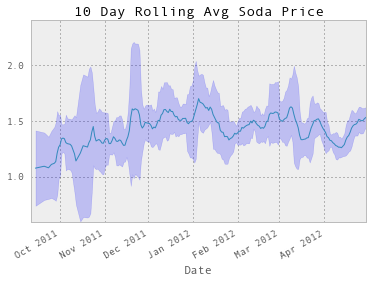

In [45]:
tenDayRollingSodaMean.plot(title= "10 Day Rolling Avg Soda Price")
plt.fill_between(tenDayRollingSodaMean.index, tenDayRollingSodaMean-2*tenDayRollingSodaStd, tenDayRollingSodaMean+2*tenDayRollingSodaStd, color='b', alpha=0.2)

Now, you do the same thing for the per-country plot:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b195750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b7cde50>]], dtype=object)

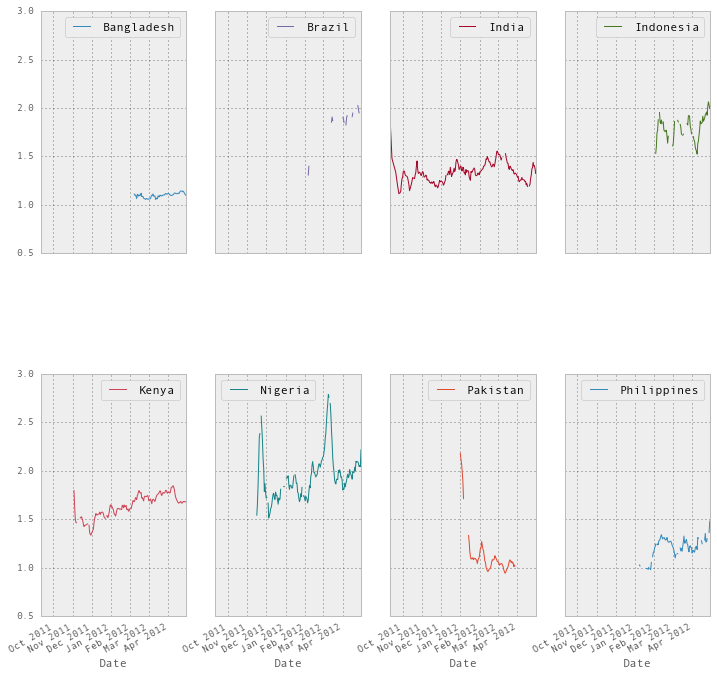

In [49]:
countryRollingSodaMeans = byCountrySodaMeans.rolling(window=7).mean()
countryRollingSodaMeans = countryRollingSodaMeans.unstack(level=0)

countryRollingSodaMeans.plot(subplots=True,
                             figsize=(12,12),
                             layout=(2,4),sharey=True)# Put your code here
# Don't forget to use unstackedByCountryMeans instead of the stacked version!

You can also resample your timeseries data by using the `resample` function from within your `DataFrame` or `Series` object (as long as the `index` of your object is a properly formatted date!):

In [51]:
weeklyDownsampledMeans = sodaMeans.resample(rule = 'W',how = "mean")
print sodaMeans.shape
weeklyDownsampledMeans.shape
#print weeklyDownsampledCountryMeans.head()
#weeklyDownsampledCountryMeans.plot()

(217,)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


(35,)

Here we are resampling (downsampling) the data by averaging on a weekly basis. We pass `W` to the `rule` parameter and `mean` to the `how` parameter (this is the default). 

The allowed values for the `rule` parameter are: 

* B: business day frequency
* C: custom business day frequency (experimental)
* D: calendar day frequency
* W: weekly frequency
* M: month end frequency
* BM: business month end frequency
* CBM: custom business month end frequency
* MS: month start frequency
* BMS: business month start frequency
* CBMS:	custom business month start frequency
* Q: quarter end frequency
* BQ: business quarter endfrequency
* QS: quarter start frequency
* BQS: business quarter start frequency
* A: year end frequency
* BA: business year end frequency
* AS: year start frequency
* BAS: business year start frequency
* H: hourly frequency
* T: minutely frequency
* S: secondly frequency
* L: milliseonds
* U: microseconds
* N: nanoseconds

Some of the allowed values for the `how` parameter are:

* sem
* sum
* mean
* median
* min
* max
* std
* first
* last
* ohlc

As always, theres more information in the [docs](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#up-and-downsampling)

You can even upsample (instead of downsampling) by providing a `fill_method` parameter (although I wouldn't recommend upsampling generally unless you have a really good reason, also in this case the `how` parameter doesn't make sense to be used):

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).pad()
  if __name__ == '__main__':


Date
2011-09-11    1.248738
2011-09-12    1.202488
2011-09-13    0.936553
2011-09-14    0.936553
2011-09-20    1.165488
Name: Conv_Price, dtype: float64


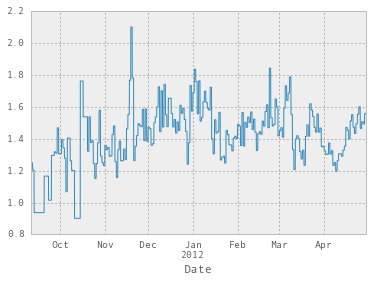

In [54]:
hourlyUpsampledMeans = sodaMeans.resample(rule = 'H',fill_method = 'pad')
print sodaMeans.head()
hourlyUpsampledMeans.head()
hourlyUpsampledMeans.plot()

Ok, now lets move onto plotting histograms.

Lets plot the distribution of all soda prices:

* regardless of date across all countries
* on a per-country basis

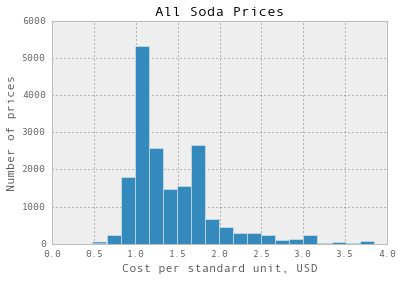

In [55]:
#sodaPrices
sodaPrices.Conv_Price.hist(bins=20)
plt.title("All Soda Prices")
plt.ylabel("Number of prices")
plt.xlabel("Cost per standard unit, USD")

To plot a histogram, just use the `hist()` function on the column you're interested in!

However, this looks like it might be too few bins (by default, the number of bins in the histogram is 10).

To alter the number of bins, pass a value to the `bins` parameter:

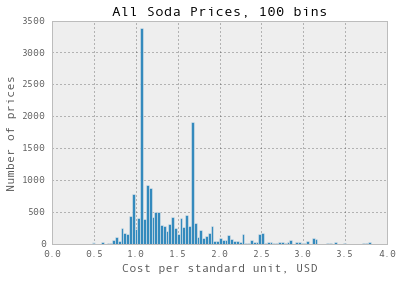

In [60]:
sodaPrices["Conv_Price"].hist(bins=100)
plt.title("All Soda Prices, 100 bins")
plt.ylabel("Number of prices")
plt.xlabel("Cost per standard unit, USD")

To do this on a per-country basis just pass the column that stores the country parameter to the `by` parameter:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12320c650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123542810>]], dtype=object)

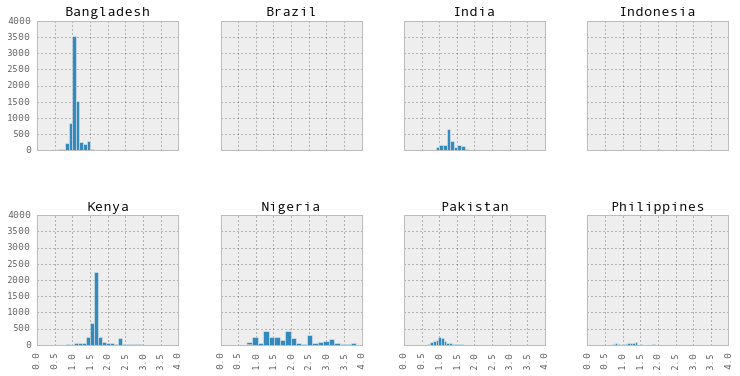

In [63]:
sodaPrices["Conv_Price"].hist(by=sodaPrices["Country"],
                              bins=20, layout = (2,4),
                              figsize=(12,6),
                              sharex=True,sharey=True)

I've added some other necessary configurations (that you now know about!) to make it more readable (how come I passed `sharex` this time instead of `sharey`?).

We can also stack the histograms on top of each other and look at them in a single plot, although its a bit trickier:

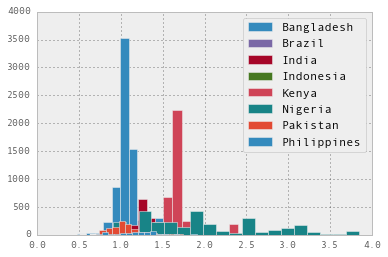

In [65]:
stackedHistogram = sodaPrices["Conv_Price"].groupby(sodaPrices["Country"]).hist(bins=20)
#stackedHistogram
#plt.xlabel("Cost per unit, USD")
#plt.ylabel("Price Counts")
plt.legend(stackedHistogram.index)
#plt.title("Stacked, per-country histograms")

Here we actually have to create the groups (by country objects) before we call the `hist()` function. 

We also have to pass the indices of the groups (which can be accessed in the `stackedHistogram` variable that stores figure information) to a function called `legend` that can be accessed from `plt`.

In this case, it is a bit confusing, but effectively, we can manipulate the figure using calls from `plt` and the values in the figure from `stackedHistogram`.

Here, `stackedHistogram` is a `Series` (so it only has one column), but the values in the column aren't `string` or `int` or `float` data types, but rather handles to the different stacked histogram plots we created.

This allows us to access the `Series` indices (the names of the Countries) by calling `stackedHistogram.index` and display those names as part of the legend by passing them to a call to `plt.legend`.

If this is confusing, its ok, because it is confusing to me too. Plotting in **pandas** isn't perfect, so I'm just showing you the simplest way (that I have found) to get this done.

Now let's make some old fashioned bar graphs, aggregating across all of our soda prices on a per-country level:

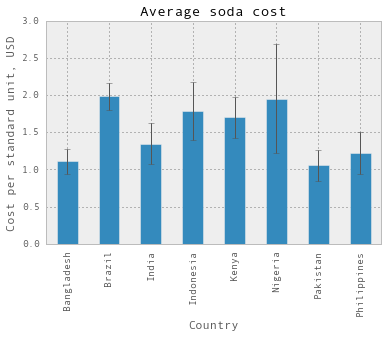

In [66]:
errs = sodaPrices.groupby("Country")["Conv_Price"].std()
sodaPrices.groupby("Country")["Conv_Price"].agg(np.mean).plot(yerr = errs,kind='bar', title = "Average soda cost")
plt.ylabel("Cost per standard unit, USD")

I've been showing you a lot of functionality of **pandas** throughout this course, but I've actually forgotten to show you one critical aspect of working with all of this data:

* Saving your tables and figures as results!

To save a table you're working on, use the `to_csv()` function (unless you want to save it as some other format, pandas has [lots of formats](http://pandas.pydata.org/pandas-docs/dev/io.html) that you can save your tables as).

Furthermore, you can pass whether you want to save the header, (column names), the index, or the kind of separator you want to use like this: 

In [70]:
sodaMeans.to_csv("/Users/sergeyfogelson/Desktop/myawesomefile")

Here we are saying we want to write out the column names but not the index, and that we want to use `::` as the separator between columns (haven't we seen this separator before?).

To save graphs, just call `savefig()` from the `plt` module you've imported with a couple parameters. Just like other `plt` function calls, this will save the current figure you're working on:

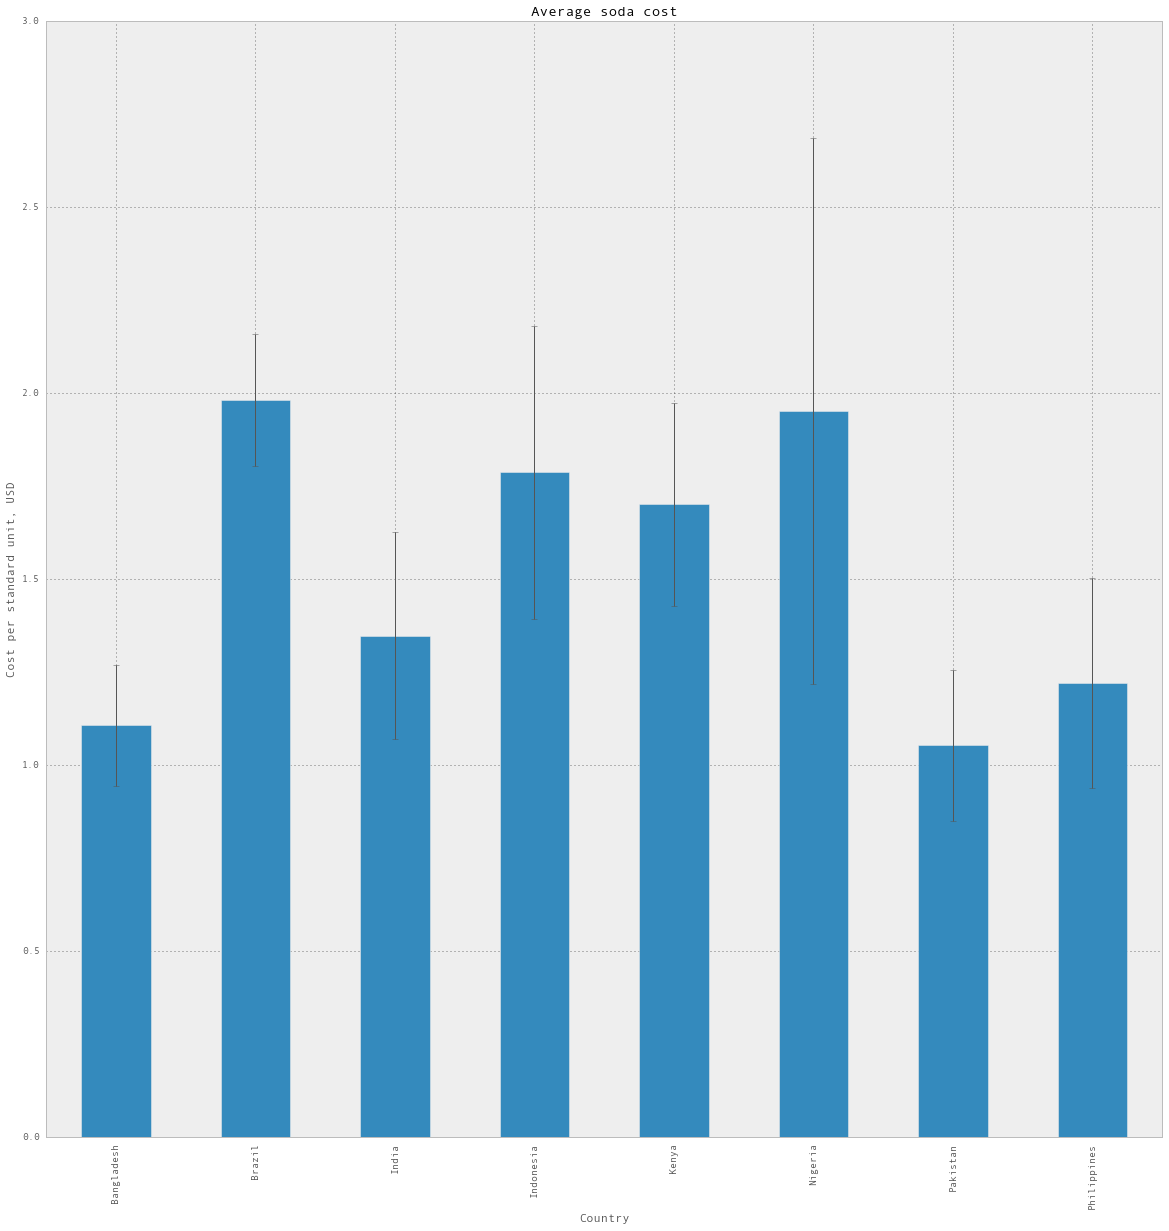

In [71]:
errs = sodaPrices.groupby("Country")["Conv_Price"].agg(np.std)
sodaPrices.groupby("Country")["Conv_Price"].agg(np.mean).plot(yerr = errs,
                                                              kind='bar', 
                                                              title = "Average soda cost",
                                                              figsize=(10,10))
plt.ylabel("Cost per standard unit, USD")
plt.savefig("/Users/sergeyfogelson/code/myFig.png")

The above code will recreate the means plot we were just working on and save the figure in the file called `myFig.png` in your current directory. If you want to save it somewhere else, just provide the full path for the file like this:

`plt.savefig("/path/to/where/i/want/to/save/this/myFig.png")`

To finish this lesson off, try to create the following graphs from scratch:

* The distribution (histogram) of the cost of each of the 3 kinds of oil found in the dataset:
  * overlaid on top of each other
  * in 3 separate graphs, one per oil type
  * all 3 combined into a single distribution
  * on a per-country basis
* The timeseries of the cost of each oil over the lifetime of the dataset: 
  * resampled to a weekly mean
  * with a rolling 14 day mean
* A bar graph of the average cost (with standard deviations overlaid) of each oil:
  * regardless of country or timeperiod
  * on a per-year basis, regardless of country

With this out of the way, we are going to finish things off with one final lab putting everything together!